In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()

In [41]:
X = iris.data
y = iris.target

In [42]:
X = X[y < 2, :2]
y = y[y<2]

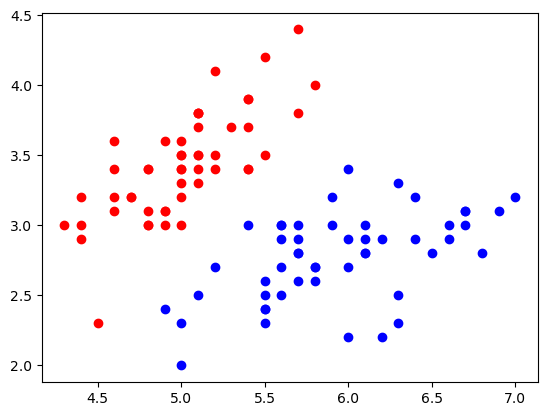

In [43]:
plt.scatter(X[y==0,0], X[y==0,1], color='red')
plt.scatter(X[y==1,0], X[y==1,1], color='blue')
plt.show()

In [44]:
from playML.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, seed=666)

In [45]:
from playML.LogisticRgression import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [46]:
log_reg.score(X_test, y_test)

1.0

In [47]:
log_reg.coefficient_

array([ 3.01796521, -5.04447145])

In [48]:
log_reg.interception_

-0.6937719272911226

In [49]:
def x2(x1):
    return (-log_reg.coefficient_[0] * x1 - log_reg.interception_) / log_reg.coefficient_[1]

In [50]:
x1_plot = np.linspace(4, 8, 1000)
x2_plot = x2(x1_plot)

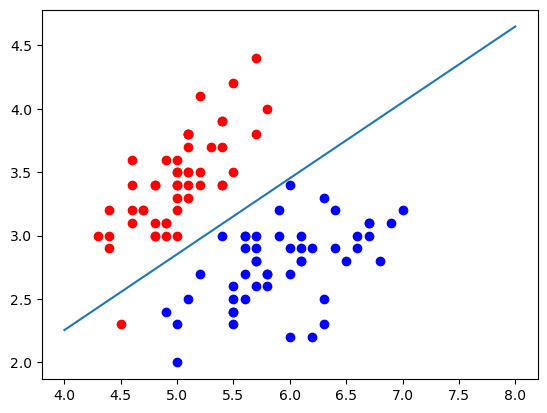

In [51]:
plt.scatter(X[y==0,0], X[y==0,1], color='red')
plt.scatter(X[y==1,0], X[y==1,1], color='blue')
plt.plot(x1_plot, x2_plot)
plt.show()

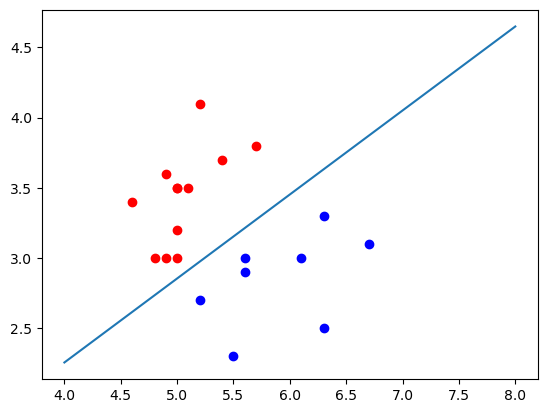

In [52]:
plt.scatter(X_test[y_test==0,0], X_test[y_test==0,1], color='red')
plt.scatter(X_test[y_test==1,0], X_test[y_test==1,1], color='blue')
plt.plot(x1_plot, x2_plot)
plt.show()

In [53]:
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    #plt.contour(x0, x1, zz, linewidths=5)
    plt.contourf(x0, x1, zz, cmap=custom_cmap)

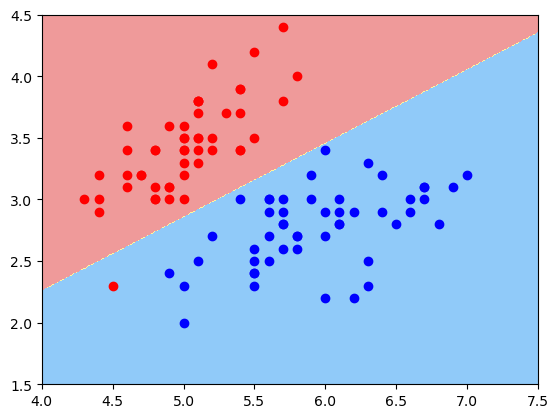

In [54]:
plot_decision_boundary(log_reg, axis=[4, 7.5, 1.5, 4.5])
plt.scatter(X[y==0,0], X[y==0,1], color='red')
plt.scatter(X[y==1,0], X[y==1,1], color='blue')
plt.show()

# KNN 的决策边界

In [55]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

KNeighborsClassifier()

In [56]:
knn_clf.score(X_test, y_test)

1.0

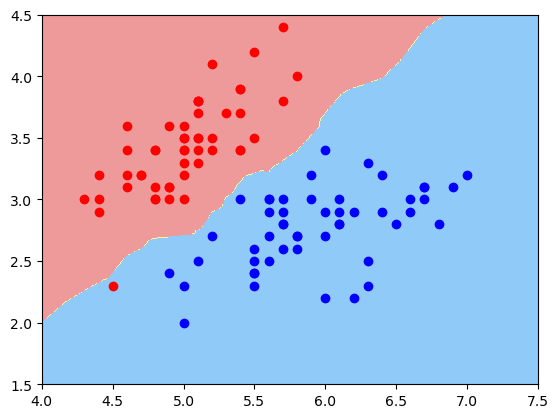

In [57]:
plot_decision_boundary(knn_clf, axis=[4, 7.5, 1.5, 4.5])
plt.scatter(X[y==0,0], X[y==0,1], color='red')
plt.scatter(X[y==1,0], X[y==1,1], color='blue')
plt.show()

In [58]:
knn_clf_all = KNeighborsClassifier()

In [59]:
knn_clf_all.fit(iris.data[:, :2], iris.target)

KNeighborsClassifier()

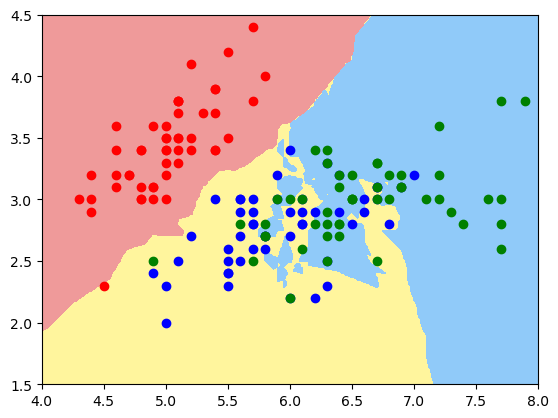

In [60]:
plot_decision_boundary(knn_clf_all, axis=[4, 8, 1.5, 4.5])
plt.scatter(iris.data[iris.target==0,0], iris.data[iris.target==0,1], color='red')
plt.scatter(iris.data[iris.target==1,0], iris.data[iris.target==1,1], color='blue')
plt.scatter(iris.data[iris.target==2,0], iris.data[iris.target==2,1], color='green')
plt.show()

In [61]:
knn_clf_all = KNeighborsClassifier(n_neighbors=50)
knn_clf_all.fit(iris.data[:, :2], iris.target)

KNeighborsClassifier(n_neighbors=50)

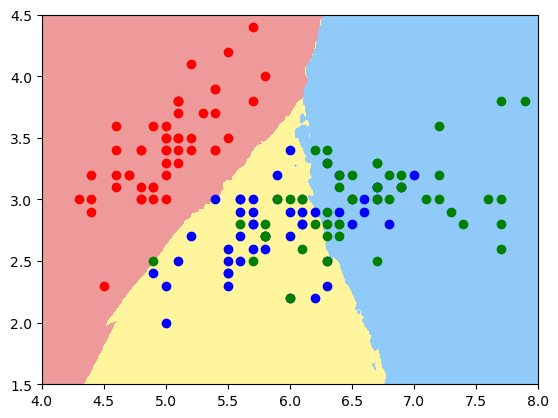

In [62]:
plot_decision_boundary(knn_clf_all, axis=[4, 8, 1.5, 4.5])
plt.scatter(iris.data[iris.target==0,0], iris.data[iris.target==0,1], color='red')
plt.scatter(iris.data[iris.target==1,0], iris.data[iris.target==1,1], color='blue')
plt.scatter(iris.data[iris.target==2,0], iris.data[iris.target==2,1], color='green')
plt.show()